# Notebook description

This notebook looks at the asymptotic SNR of a synapse with $p$-thinned uniform input spike rate $\lambda$. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_poisson.ipynb) is a notebook considering a synapse with Poisson input spikes and [here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_uniform.ipynb) is a notebook considering a synapse with uniform input spikes.

$$SNR = \frac{E[x]}{\sqrt{\operatorname{Var}(x)}}.$$

The synapse with input spikes is a first order lowpass filter described by
$$\tau\dot{x}=-x+\sum_i\delta(t-t_i)I_i$$

where $x$ is the synapse state, $t_i$ is the arrival time of the $i$th spike, and $I_i$ thins the spikes. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_demo.ipynb) is a notebook demoing a synapse. Spikes are uniform so $t_i=\frac{i}{\lambda}$, and $I\in\{0,1\}$ indicates whether we keep the $i$th spike or not.

For a given offset in time within one period, $t_0$, the value of the synapse looking back in time is 

$$x=\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}I_i.$$

# Summary of findings

<div style="display:block; border: 1px solid black; padding: 15px;background-color: #EEEEFF;margin: 10px">
\begin{align}
E[x] &= \lambda p \\
\end{align}

\begin{align}
\operatorname{Var}(x)&=\lambda^2 p^2
  \left(\frac{1}{2\lambda p\tau}\left(1 - p + p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1\right) \\
\end{align}

\begin{align}
SNR &= \frac{1}{\sqrt{\frac{1}{2\lambda p\tau}\left(1-p+p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1}} \\
\end{align}
</div>

# Derivations

With 

$$t_0\sim U[0, 1/\lambda]$$ 
and

$$I_i = 
\begin{cases}
1 \quad \text{with probability} \quad p \\
0 \quad \text{with probability} \quad (1-p)
\end{cases}
$$
we find $E[x]$, $\operatorname{Var}(x)$, and $SNR$.

Solving for $E[x]$,

\begin{align}
E[x] &= E\left[\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}I_i\right] \\
 &= \frac{1}{\tau}E\left[\sum_{i=0}^{\infty}e^{-t_i/\tau}e^{-t_0/\tau}I_i\right] \\
 &= \frac{1}{\tau}E\left[e^{-t_0/\tau}\sum_{i=0}^{\infty}e^{-t_i/\tau}I_i\right] \\
 &= \frac{1}{\tau}E\left[e^{-t_0/\tau}\right]\sum_{i=0}^{\infty}e^{-t_i/\tau}E[I_i] \\
 &= \lambda\left(1-e^{-1/\lambda\tau}\right)\sum_{i=0}^{\infty}e^{-t_i/\tau}p \\
 &= \lambda p\left(1-e^{-1/\lambda\tau}\right)\frac{1}{1-e^{-1/\lambda\tau}} \\
E[x] &= \lambda p.
\end{align}

To cross-check, consider that when $p=1$, $E[x]=\lambda$, which is the same $E[x]$ as when the synapse receives unthinned uniform spikes.

Solving for $E[x^2]$,

\begin{align}
E[x^2] &= E\left[\left(\sum_{i=0}^{\infty} \frac{1}{\tau}e^{-(t_i+t_0)/\tau}I_i\right)^2\right] \\
 &= \frac{1}{\tau^2}E\left[\left(\sum_{i=0}^{\infty}e^{-t_i/\tau}e^{-t_0/\tau}I_i\right)^2\right] \\
 &= \frac{1}{\tau^2}E\left[\left(e^{-t_0/\tau}\sum_{i=0}^{\infty}e^{-t_i/\tau}I_i\right)^2\right] \\
 &= \frac{1}{\tau^2}E\left[\left(e^{-t_0/\tau}\right)^2\right]
    E\left[\left(\sum_{i=0}^{\infty}e^{-t_i/\tau}I_i\right)^2\right] \\
 &= \frac{1}{\tau^2}\frac{\lambda\tau}{2}\left(1-e^{-2/\lambda\tau}\right)
    E\left[\left(\sum_{i=0}^{\infty}e^{-t_i/\tau}I_i\right)^2\right] \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    E\left[\left(\sum_{i=0}^{\infty}e^{-t_i/\tau}I_i\right)^2\right] \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    E\left[\left(I_0+e^{-1/\lambda\tau}I_1+e^{-2/\lambda\tau}I_2+\ldots\right)
           \left(I_0+e^{-1/\lambda\tau}I_1+e^{-2/\lambda\tau}I_2+\ldots\right)\right] \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    E\left[\sum_{k=0}^{\infty}e^{-2k/\lambda\tau}I_k^2 + 
           \sum_{i=0,i\neq j}^{\infty}\sum_{j=0}^{\infty}e^{-i/\lambda\tau}e^{-j/\lambda\tau}I_iI_j\right] \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\sum_{k=0}^{\infty}e^{-2k/\lambda\tau}E\left[I_k^2\right] + 
           \sum_{i=0,i\neq j}^{\infty}\sum_{j=0}^{\infty}e^{-i/\lambda\tau}e^{-j/\lambda\tau}E[I_iI_j]\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\sum_{k=0}^{\infty}e^{-2k/\lambda\tau}p + 
           \sum_{i=0,i\neq j}^{\infty}\sum_{j=0}^{\infty}e^{-i/\lambda\tau}e^{-j/\lambda\tau}E[I_i]E[I_j]\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\sum_{k=0}^{\infty}e^{-2k/\lambda\tau}p + 
           \sum_{i=0,i\neq j}^{\infty}\sum_{j=0}^{\infty}e^{-i/\lambda\tau}e^{-j/\lambda\tau}p^2\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
           p^2\sum_{j=0}^{\infty}e^{-j/\lambda\tau}\sum_{i=0,i\neq j}^{\infty}e^{-i/\lambda\tau}\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
           p^2\sum_{j=0}^{\infty}e^{-j/\lambda\tau}
              \left(\sum_{i=0}^{\infty}e^{-i/\lambda\tau}-e^{-j/\lambda\tau}\right)\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
           p^2\sum_{j=0}^{\infty}e^{-j/\lambda\tau}
              \left(\frac{1}{1-e^{-1/\lambda\tau}}-e^{-j/\lambda\tau}\right)\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
          p^2\left(\frac{1}{1-e^{-1/\lambda\tau}}\sum_{j=0}^{\infty}e^{-j/\lambda\tau}
                -\sum_{j=0}^{\infty}e^{-2j/\lambda\tau}\right)\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
          p^2\left(\frac{1}{\left(1-e^{-1/\lambda\tau}\right)^2}
                -\frac{1}{1-e^{-2/\lambda\tau}}\right)\right) \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2/\lambda\tau}\right)
    \left(\frac{p}{1-e^{-2/\lambda\tau}} + 
          \frac{p^2}{\left(1-e^{-1/\lambda\tau}\right)^2}-\frac{p^2}{1-e^{-2/\lambda\tau}}\right) \\
 &= \frac{\lambda p}{2\tau}\left(1 - p + p\frac{1+e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right) \\
E[x^2] &= \frac{\lambda p}{2\tau}\left(1 - p + p\coth\left(\frac{1}{2\lambda\tau}\right)\right) \\
\end{align}

To cross-check, consider that when $p=1$, 

$$E[x^2]=\frac{\lambda}{2\tau}\coth\left(\frac{1}{2\lambda\tau}\right),$$ 

which is the same $E[x^2]$ as when the synapse receives unthinned uniform spikes.

Solving for $\operatorname{Var}(x)$,

\begin{align}
\operatorname{Var}(x) &= E[x^2]-E[x]^2 \\
 &= \frac{\lambda p}{2\tau}\left(1 - p + p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-\left(\lambda p\right)^2 \\
 &= \lambda^2 p^2\left(\frac{1}{2\lambda p\tau}\left(1 - p + p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1\right). \\
\end{align}

The $SNR$ is

\begin{align}
SNR &= \frac{E[x]}{\sqrt{\operatorname{Var}(x)}} \\
 &= \frac{\lambda p}{\lambda p\sqrt{
    \frac{1}{2\lambda p\tau}\left(1-p+p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1}} \\
 &= \frac{1}{\sqrt{\frac{1}{2\lambda p\tau}\left(1-p+p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1}}. \\
\end{align}

If we use the linear approximation of $\coth(\frac{1}{2\lambda\tau})$, which is valid for $\frac{1}{2\lambda\tau}$ near 0, we can simplify the variance and SNR expressions to something more intuitive.

\begin{align}
\operatorname{Var}(x) 
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}\left(1-p+p\coth\left(\frac{1}{2\lambda\tau}\right)\right)-1\right) \\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}
    \left(1-p+p\frac{1+e^{-1/\lambda\tau}}{1-e^{-1/\lambda\tau}}\right)-1\right) \\
 &\approx \lambda^2p^2\left(\frac{1}{2\lambda p\tau}
    \left(1-p+p\frac{1+(1-1/\lambda\tau)}{1-(1-1/\lambda\tau)}\right)-1\right) & \text{expanding the exponentials}\\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}
    \left(1-p+p\frac{2-1/\lambda\tau)}{1/\lambda\tau}\right)-1\right) \\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}\left(1-p+p(2\lambda\tau-1)\right)-1\right) \\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}\left(1-p+2\lambda p\tau-p\right)-1\right) \\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}\left(1-2p+2\lambda p\tau\right)-1\right) \\
 &= \lambda^2p^2\left(\frac{1}{2\lambda p\tau}-\frac{1}{\lambda\tau}+1-1\right) \\
\operatorname{Var}(x) &\approx \lambda^2p^2\left(\frac{1}{2\lambda p\tau}-\frac{1}{\lambda\tau}\right) \\
\end{align}

Using this approximation,

\begin{align}
SNR &\approx \frac{\lambda p}{\lambda p\sqrt{\frac{1}{2\lambda p\tau}-\frac{1}{\lambda\tau}}} \\
 &= \frac{1}{\sqrt{\frac{1}{2\lambda\tau}\left(\frac{1}{p}-2\right)}} \\
 &= \frac{1}{\sqrt{\frac{1}{p}-2}}\sqrt{2\lambda\tau} \\
\end{align}

Here we can see that the SNR is approximately a scaled version of the SNR of the synapse receiving Poisson spikes. 

Note that the approximation is only valid when $p<0.5$.

# Theoretical plots

In [2]:
%pylab inline
import numpy as np

s = random.seed(2)
rng = random.RandomState(s)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# theory functions
def th_mean(lam, p):
    return lam* p

def th_mean_sq(lam, p, tau):
    return lam/(2*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))

def th_var(lam, p, tau):
    return lam**2*p**2*(1./(2.*lam*p*tau)*(1-p+p*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau))))-1)

def th_snr(lam, p, tau):
    return 1./np.sqrt(1./(2.*lam*p*tau)*(1-p+p*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau))))-1)

# theory functions for uniform
def th_mean_u(lam):
    return lam

def th_mean_sq_u(lam, tau):
    return lam/(2*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))

def th_var_u(lam, tau):
    return lam**2*(1./(2.*lam*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))-1)

def th_snr_u(lam, tau):
    return 1./np.sqrt(1./(2.*lam*tau)*(1+np.exp(-1/(lam*tau)))/(1-np.exp(-1/(lam*tau)))-1)

# theory functions for Poisson
def th_mean_p(lam):
    return lam

def th_mean_sq_p(lam, tau):
    return lam/(2.*tau) + lam**2

def th_var_p(lam, tau):
    return lam/(2.*tau)

def th_snr_p(lam, tau):
    return np.sqrt(2*lam*tau)

# simulation functions
def get_p_thin(p, size):
    thin = rng.uniform(0., 1., size=size)
    keep_idx = thin<=p
    thin[keep_idx] = 1.
    thin[~keep_idx] = 0.
    return thin

def spike_value(t, tau):
    return 1./tau*exp(-t/tau)

def get_snr(mu, var):
    return mu/np.sqrt(var)

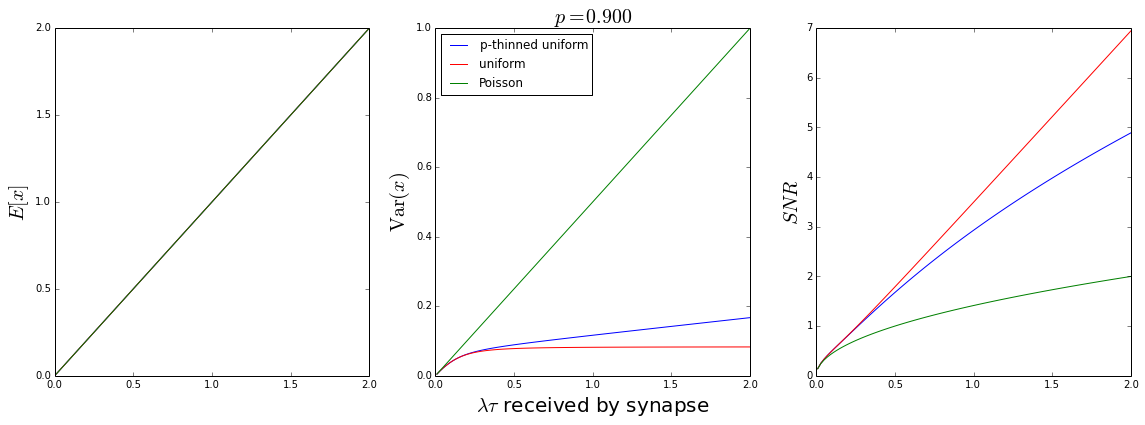

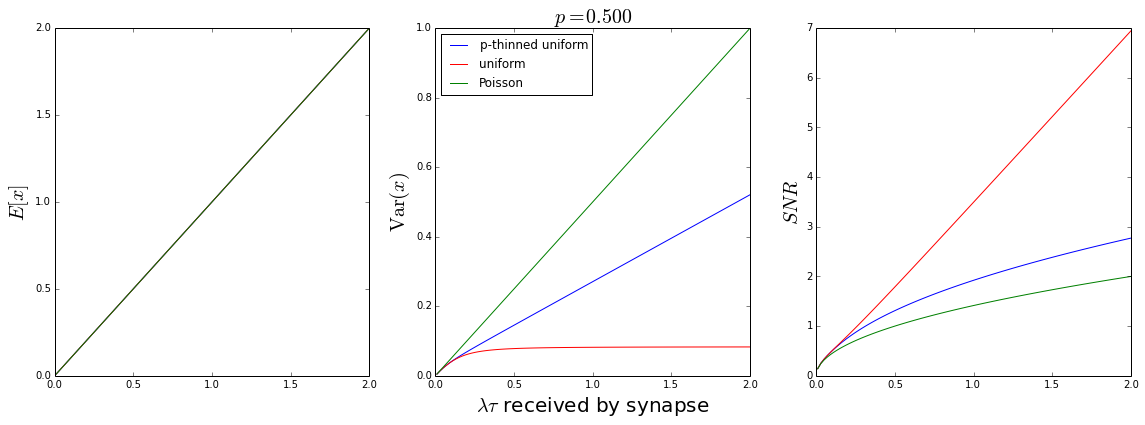

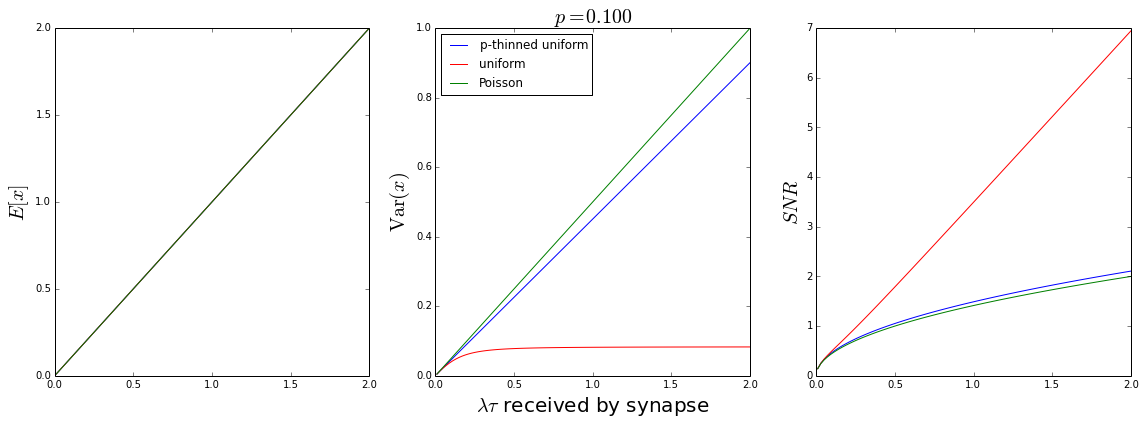

In [6]:
def plot_theory(p, tau, lam):
    lam_p = lam/p
    e_x = th_mean(lam_p, p)
    var_x = th_var(lam_p, p, tau)
    snr_x = th_snr(lam_p, p, tau)

    e_x_u = th_mean_u(lam)
    var_x_u = th_var_u(lam, tau)
    snr_x_u = th_snr_u(lam, tau)

    e_x_p = th_mean_p(lam)
    var_x_p = th_var_p(lam, tau)
    snr_x_p = th_snr_p(lam, tau)

    fig = figure(figsize=(16,6))
    subplot(131)
    plot(lam*tau, e_x*tau, 'b')
    plot(lam*tau, e_x_u*tau, 'r')
    plot(lam*tau, e_x_p*tau, 'g')
    ylabel(r'$E[x]$', fontsize=20)
    subplot(132)
    plot(lam*tau, var_x*tau**2, 'b', label='p-thinned uniform')
    plot(lam*tau, var_x_u*tau**2, 'r', label='uniform')
    plot(lam*tau, var_x_p*tau**2, 'g', label='Poisson')
    legend(loc='upper left')
    title(r'$p=%.3f$' % (p), fontsize=20)
    xlabel(r'$\lambda\tau$ received by synapse', fontsize=20);
    ylabel(r'$\operatorname{Var}(x)$', fontsize=20)
    subplot(133)
    plot(lam*tau, snr_x, 'b')
    plot(lam*tau, snr_x_u, 'r')
    plot(lam*tau, snr_x_p, 'g')
    ylabel(r'$SNR$', fontsize=20)
    tight_layout()

lam = np.linspace(1,200,100)
plot_theory(.9, .01, lam)
plot_theory(.5, .01, lam)
plot_theory(.1, .01, lam)

The plots suggest that the SNR of a synapse grows asymptotically linearly with the input rate for uniform spiking input. This is a better scaling than a synapse with Poisson spiking input, in which the SNR grows with the square root of the input rate.

# Fixed Rate Simulation

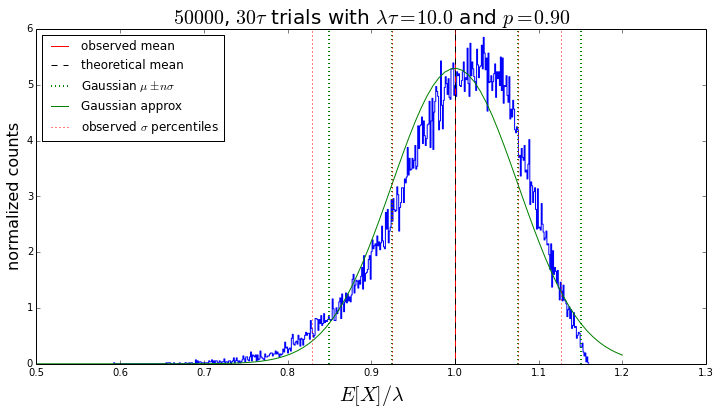

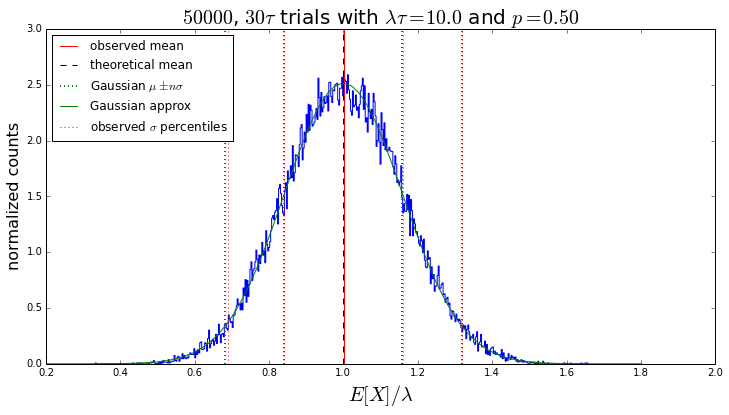

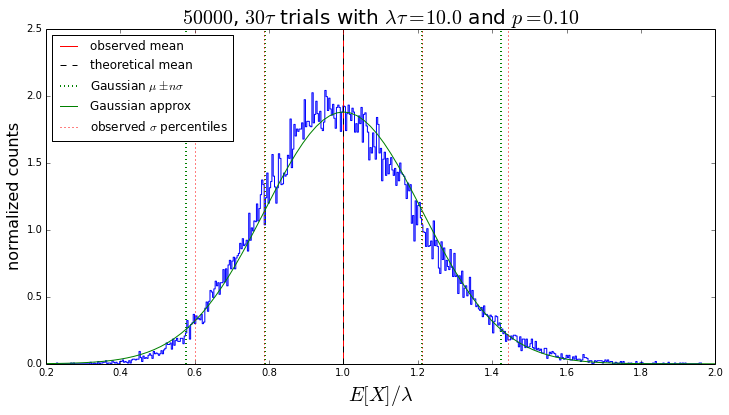

In [13]:
def sim_distribution(k=100., tau=.01, p=1., lam=1000., trials=4000):
    # k number of time constants to consider
    # tau time constant of the filter
    # lam frequency of spikes into the synapse
    lam_p = lam/p
    nspikes = k*tau*lam_p

    shifts = rng.uniform(0, 1./lam_p, size=(trials))
    base_times = np.arange(nspikes)/lam_p
    spike_times = np.tile(base_times, (trials,1))
    for idx, shift in enumerate(shifts):
        spike_times[idx,:] +=  shift
    spike_vals = spike_value(spike_times, tau)
    thin = get_p_thin(p, size=spike_vals.shape)
    Xs = np.sum(spike_vals*thin, axis=1)

    fig=figure(figsize=(12,6))
    ax=fig.add_subplot(111)
    ret=ax.hist(Xs/lam, bins=max(10, trials/100), normed=True, histtype='step')

    mean_obs = mean(Xs)
    mean_th = th_mean(lam_p, p)
    axvline(mean_obs/lam, color='r', label='observed mean')
    axvline(mean_th/lam, color='k', linestyle='--', label='theoretical mean')

    var_obs = var(Xs)
    var_th = th_var(lam_p, p, tau)
    std_th = np.sqrt(var_th)

    for n in [1.,2.]:
        line = axvline((mean_th+n*std_th)/lam, color='g', linestyle=':', linewidth=2)
        line = axvline((mean_th-n*std_th)/lam, color='g', linestyle=':', linewidth=2)
    a, astep = np.linspace(xlim()[0], xlim()[1], 100, retstep=True)
    def normal_pdf(x, mu=0., sigma=1.):
        return 1./(sigma*np.sqrt(2*pi))*np.exp(-(x-mu)**2/(2*sigma**2))
    normal_approx = normal_pdf(a, mean_th/lam, std_th/lam)
    plot(a, normal_approx, 'g', label='Gaussian approx')
    line.set_label(r'Gaussian $\mu \pm n\sigma$')

    from scipy.special import erf
    def normal_cdf(x, mu=0., sigma=1.):
        return 1./2.*(1+erf((x-mu)/(sigma*np.sqrt(2))))
    for n in [1.,2.]:
        percentiles = [normal_cdf(-n)*100., normal_cdf(n)*100.]
        pct_obs = np.percentile(Xs, percentiles)
        line = axvline(pct_obs[0]/lam, color='r', linestyle=':')
        line = axvline(pct_obs[1]/lam, color='r', linestyle=':')
    line.set_label(r'observed $\sigma$ percentiles')

    ax.set_title(r'$%d$, $%d\tau$ trials with $\lambda\tau=%.1f$ and $p=%.2f$' % (trials, k, lam*tau, p), fontsize=20)
    ax.set_ylabel('normalized counts', fontsize=16)
    ax.set_xlabel(r'$E[X]/\lambda$', fontsize=20)
    ax.legend(loc='upper left');

sim_distribution(k=30., tau=.01, lam=1000., p=.9, trials=50000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_09.png', dpi=200)
sim_distribution(k=30., tau=.01, lam=1000., p=.5, trials=50000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_05.png', dpi=200)
sim_distribution(k=30., tau=.01, lam=1000., p=.1, trials=50000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_01.png', dpi=200)

# Variable Rate Simulations

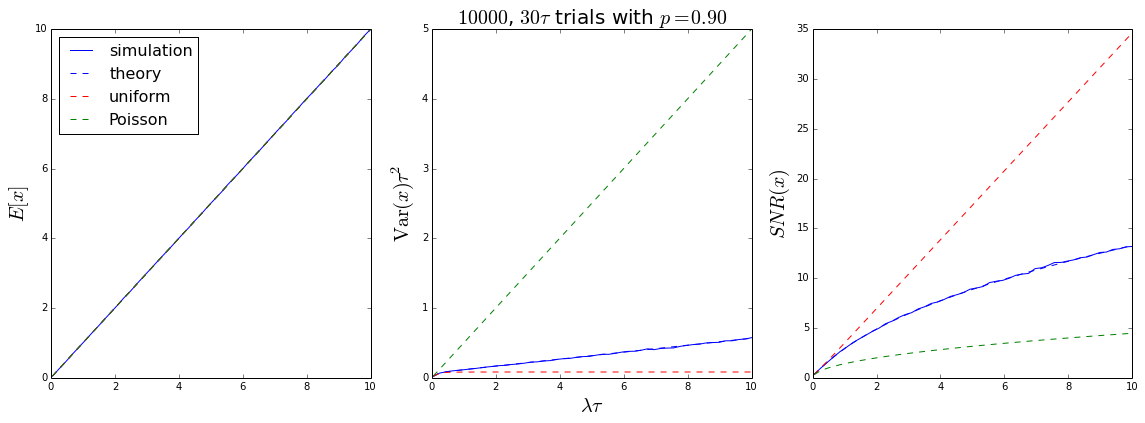

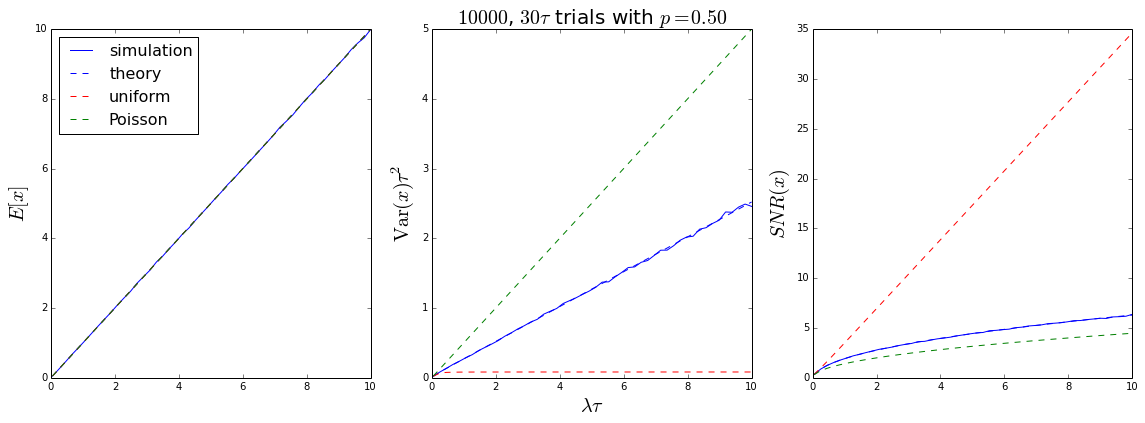

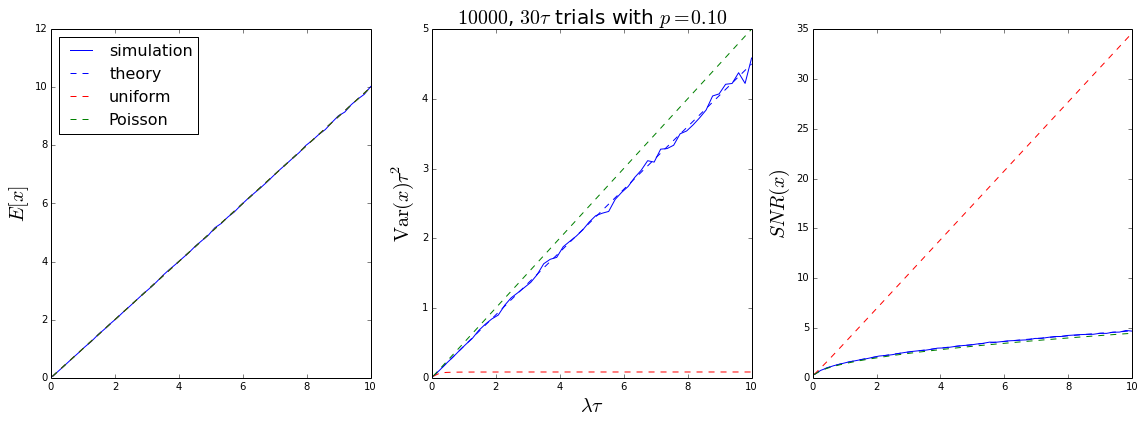

In [10]:
def check_theory(lams, k=30., tau=.01, p=1., trials=300):
    # lams array of frequencies to test
    # k number of time constants to consider in each experiment
    # tau time constant of the filter
    # lam frequency of spikes innexp = 300 # number of experiments
    nspikes = 1000 # number of spikes in each experiment
    nfreqs = len(lams) # number of frequencies to test
    lams_p = lams/p

    obs_mean = np.zeros(nfreqs)
    obs_var = np.zeros(nfreqs)
    obs_snr = np.zeros(nfreqs)
    for lam_idx, lam in enumerate(lams_p):
        nspikes = k*tau*lam
        spike_times = np.arange(nspikes)/lam
        
        shifts = rng.uniform(0, 1./lam, size=(trials))
        exp_state = np.zeros(trials)
        for idx, shift in enumerate(shifts):
            spike_xs = spike_value(spike_times+shift, tau)*get_p_thin(p, spike_times.shape)
            exp_state[idx] = np.sum(spike_xs)
        obs_mean[lam_idx] = np.mean(exp_state)
        obs_var[lam_idx] = np.var(exp_state)
        obs_snr[lam_idx] = get_snr(obs_mean[lam_idx], obs_var[lam_idx])

    mean_th = th_mean(lams_p, p)
    var_th = th_var(lams_p, p, tau)
    snr_th = th_snr(lams_p, p, tau)

    mean_th_u = th_mean_u(lams)
    var_th_u = th_var_u(lams, tau)
    snr_th_u = th_snr_u(lams, tau)

    mean_th_p = th_mean_p(lams)
    var_th_p = th_var_p(lams, tau)
    snr_th_p = th_snr_p(lams, tau)

    figure(figsize=(16,6))
    subplot(131)
    plot(lams*tau, obs_mean*tau, 'b', label='simulation')
    plot(lams*tau, mean_th*tau, 'b--', label='theory')
    plot(lams*tau, mean_th_u*tau, 'r--', label='uniform')
    plot(lams*tau, mean_th_p*tau, 'g--', label='Poisson')
    legend(loc='upper left', fontsize=16)
    ylabel(r'$E[x]$', fontsize=20)
    subplot(132)
    plot(lams*tau, obs_var*tau**2, 'b')
    plot(lams*tau, var_th*tau**2, 'b--')
    plot(lams*tau, var_th_u*tau**2, 'r--')
    plot(lams*tau, var_th_p*tau**2, 'g--')
    xlabel(r'$\lambda\tau$', fontsize=20)
    ylabel(r'$\operatorname{Var}(x)\tau^2$', fontsize=20)
    title(r'$%d$, $%d\tau$ trials with $p=%.2f$' % (trials, k, p), fontsize=20)
    subplot(133)
    plot(lams*tau, obs_snr, 'b')
    plot(lams*tau, snr_th, 'b--')
    plot(lams*tau, snr_th_u, 'r--')
    plot(lams*tau, snr_th_p, 'g--')
    ylabel(r'$SNR(x)$', fontsize=20)
    tight_layout()
    
lams = np.linspace(5, 1000, 50)
check_theory(lams, k=30, p=.9, trials=10000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_09_snr.png', dpi=200)
check_theory(lams, k=30, p=.5, trials=10000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_05_snr.png', dpi=200)
check_theory(lams, k=30, p=.1, trials=10000)
# savefig('/home/NEF/Dropbox/Research/presentations/noise_analysis/figures/p_uniform_01_snr.png', dpi=200)